In [ ]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D


## Task 1.1 

In [ ]:
def eulerstep(Tdx, uold, dt):  ##My guy gör comeback 
    unew = uold + dt*(Tdx@uold)
    return np.transpose(unew)

In [ ]:
def eulersolve(g0, alpha, beta, tend, N, M):
     deltaX = 1/(N+2)  # rumssteg från x0 till xN+1
     dt = tend/M  # tidsteg från t0 till tN där t0 = 0 
     Xgrid = np.linspace(0, 1, N+2)
     tgrid = np.linspace(0, tend, M+1)
     Tdx = la.toeplitz(np.array([-2, 1] + [0] * (N-2))) ##Skapar en Toeplitz matris för disc av andraderivatan
     Tdx = Tdx/(deltaX**2)   #Den hanterar endast interior grid points 

     Y = np.zeros((M+1, N)) #Första värdet är vilket tidssteg, det andra motsvarar x-värdet för det tidssteget.
     Y[0,:] = g0

     for i in range(M):
          Y[i+1,:] = eulerstep(Tdx, np.transpose(Y[i, :]), dt)
     Y = np.hstack((alpha*np.ones((M+1, 1)), Y, beta*np.ones((M+1, 1)))) #Lägger till gränsvärdena
     
     return Y, Xgrid, tgrid
          


In [ ]:
def plot3D(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     fig = plt.figure(figsize=(10, 10))  
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

### CFL is less than 0.5 which converges

In [ ]:
tend = 1
N = 68
M = 10000
deltaX = 1/(N+2) 
dt = tend/M 
CFL = dt/(deltaX)**2
print("CFL = " + str(CFL))

if CFL < (1/2):   
     print("will converge")
else:
     print("This will not converge")
alpha = 0
beta = 0
g0 = np.random.normal(loc=0.0, scale=1.0, size=N)
Y, Xgrid, tgrid = eulersolve(g0, alpha, beta, tend, N, M)
plot3D(Y, Xgrid, tgrid)


### This tries to find experimentally the CFL condition, converges to 0.5 but is ineffiecient, thus N is only 50.  

In [ ]:
N = 50
alpha = 0
beta = 0
g0 = np.random.normal(loc=0.0, scale=1.0, size=N)
tend = 1
maxX = 0
for X in range(1, 100):
     X = X/100
     M = int(1/X*(N+1)**2) #Vi varierar M för ett givet värde på N. ---> 100
     Y, Xgrid, tgrid = eulersolve(g0, alpha, beta, tend, N, M)
     if np.sum(np.abs(Y[-1,:])) < 0.001:
          maxX = X
     else:
          break

print('CFL = ' + str(maxX))

### CFL is equal to 0.5041, diverges. 

In [ ]:
tend = 1
N = 69
M = 10000
deltaX = 1/(N+2) 
dt = tend/M 
CFL = dt/(deltaX)**2
print("CFL = " + str(CFL))

if CFL < (1/2):   
     print("will converge")
else:
     print("This will not converge")
alpha = 0
beta = 0
g0 = np.random.normal(loc=0.0, scale=1.0, size=N)
Y, Xgrid, tgrid = eulersolve(g0, alpha, beta, tend, N, M)
plot3D(Y, Xgrid, tgrid)

## Task 1.2 

In [86]:
def trapstep(Tdx, uold, dt):
    unew = np.linalg.solve(np.eye(N)- dt/2*Tdx, uold+dt/2*Tdx@uold) 
    return unew

def trapsolve(g0, alpha, beta, tend, N, M):
     deltaX = 1/(N+1)  # rumssteg från x0 till xN+1
     dt = tend/M  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N+2)
     tgrid = np.linspace(0, tend, M+1)
     Tdx = la.toeplitz(np.array([-2, 1] + [0] * (N-2))) ##Skapar en Toeplitz matris för disc av andraderivatan
     Tdx = Tdx/(deltaX**2)   #Den hanterar endast interior grid points 

     Y = np.zeros((M+1, N)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0

     for i in range(M):
          Y[i+1,:] = np.transpose(trapstep(Tdx, np.transpose(Y[i, :]), dt))
     Y = np.hstack((alpha*np.ones((M+1, 1)), Y, beta*np.ones((M+1, 1)))) #Lägger till gränsvärdena
     
     return Y, Xgrid, tgrid
          


This would not converge if it wasn't A-stable
0.09090909090909091 0.09090909090909091


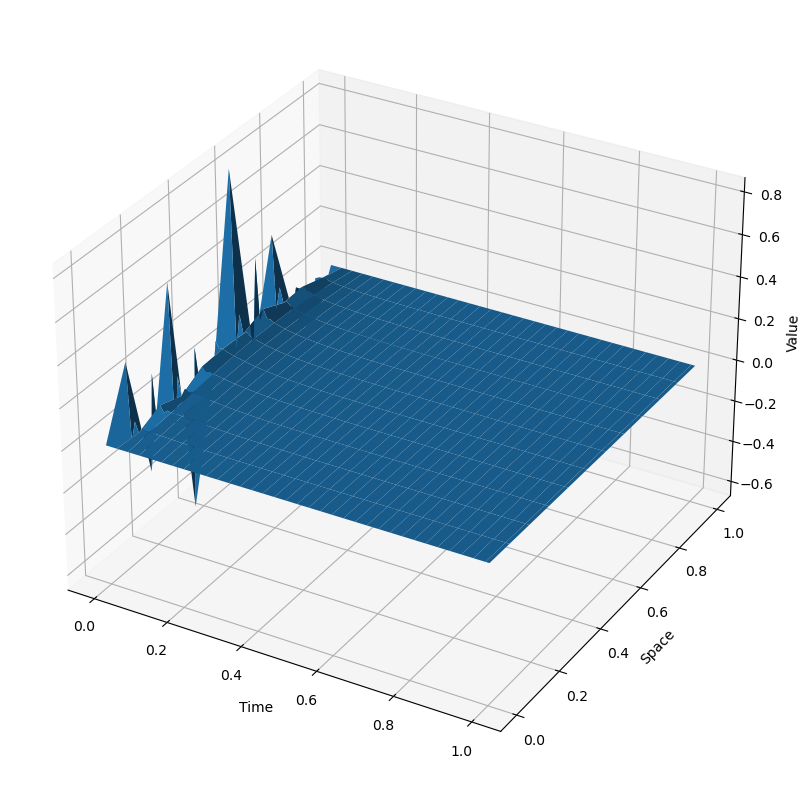

In [85]:
N = 10
M = 100
if M > 2*(N+1)**2:
     print("will converge")
else:
     print("This would not converge if it wasn't A-stable")
alpha = 0
beta = 0
g0 = np.random.normal(loc=0.0, scale=1.0, size=N)
tend = 1
Y, Xgrid, tgrid = trapsolve(g0, alpha, beta, tend, N, M)
plot3D(Y, Xgrid, tgrid)


In [ ]:
N = 10
alpha = 0
beta = 0
g0 = np.random.normal(loc=0.0, scale=1.0, size=N)
tend = 1
maxX = 0
for X in range(1,100):
     X = X/10
     M = int(1/X*(N+1)**2)
     Y, Xgrid, tgrid = trapsolve(g0, alpha, beta, tend, N, M)
     if np.sum(np.abs(Y[-1,:])) < 0.001:
          #print('Converged at X = ' + str(X))
          maxX = X
     else:
          #print('Did not converge at X = ' +  str(X))
          break
#plot3D(Y, Xgrid, tgrid)

print('CFL = ' + str(maxX))